In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 26.2 MB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Input, MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ModelCheckpoint
import plotly.express as px
from numpy import expand_dims
from keras.applications import MobileNet

In [4]:
train_df = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_test.csv")

In [5]:
test = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_test.csv")
y = test['label']

In [6]:
labele = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [7]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [9]:
x_train = train_df.values
x_test = test_df.values

In [10]:
x_train_rgb_pom = x_train.reshape(-1,28,28,1)
x_test_rgb_pom = x_test.reshape(-1,28,28,1)

images = tf.convert_to_tensor(x_train_rgb_pom, dtype=tf.uint8)
x_train = tf.image.grayscale_to_rgb(images,name=None)

images1 = tf.convert_to_tensor(x_test_rgb_pom, dtype=tf.uint8)
x_test = tf.image.grayscale_to_rgb(images1,name=None)

In [11]:
def plot_loss_accuracy(history):
  epochs = [i for i in range(20)]
  fig , ax = plt.subplots(1,2)
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  fig.set_size_inches(16,9)
  
  ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
  ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
  ax[0].set_title('Training & Validation Accuracy')
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")
  
  ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
  ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
  ax[1].set_title('Training & Validation Loss')
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")
  plt.show()

**Mobile Net**

In [12]:
x_train= tf.image.resize(x_train, [75, 75])
x_test = tf.image.resize(x_test, [75, 75])

In [13]:
print(x_train.shape)
print(x_test.shape)

(27455, 75, 75, 3)
(7172, 75, 75, 3)


In [14]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.20,
    preprocessing_function = tf.keras.applications.mobilenet.preprocess_input
)
datagen_train.fit(x_train)

In [15]:
x_test = tf.keras.applications.mobilenet.preprocess_input(x_test)

In [16]:
conv_base = tf.keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(75,75,3))

17225924/17225924 [==============================] - 0s 0us/step


In [17]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 38, 38, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 38, 38, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 38, 38, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 38, 38, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 38, 38, 32)       128       
 ation)                                         

In [18]:
for layer in conv_base.layers[:84]:
    layer.trainable = False
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1 False
2 conv1_bn False
3 conv1_relu False
4 conv_dw_1 False
5 conv_dw_1_bn False
6 conv_dw_1_relu False
7 conv_pw_1 False
8 conv_pw_1_bn False
9 conv_pw_1_relu False
10 conv_pad_2 False
11 conv_dw_2 False
12 conv_dw_2_bn False
13 conv_dw_2_relu False
14 conv_pw_2 False
15 conv_pw_2_bn False
16 conv_pw_2_relu False
17 conv_dw_3 False
18 conv_dw_3_bn False
19 conv_dw_3_relu False
20 conv_pw_3 False
21 conv_pw_3_bn False
22 conv_pw_3_relu False
23 conv_pad_4 False
24 conv_dw_4 False
25 conv_dw_4_bn False
26 conv_dw_4_relu False
27 conv_pw_4 False
28 conv_pw_4_bn False
29 conv_pw_4_relu False
30 conv_dw_5 False
31 conv_dw_5_bn False
32 conv_dw_5_relu False
33 conv_pw_5 False
34 conv_pw_5_bn False
35 conv_pw_5_relu False
36 conv_pad_6 False
37 conv_dw_6 False
38 conv_dw_6_bn False
39 conv_dw_6_relu False
40 conv_pw_6 False
41 conv_pw_6_bn False
42 conv_pw_6_relu False
43 conv_dw_7 False
44 conv_dw_7_bn False
45 conv_dw_7_relu False
46 conv_pw_7 False
47 conv_pw_7_bn 

In [19]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 38, 38, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 38, 38, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 38, 38, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 38, 38, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 38, 38, 32)       128       
 ation)                                         

In [20]:
x=conv_base.output
x = Flatten()(x)
x = Dense(24, activation='softmax')(x)
model = Model(inputs=conv_base.input, outputs=x)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 38, 38, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 38, 38, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 38, 38, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 38, 38, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 38, 38, 32)       128       
 ation)                                                      

In [22]:
path = '/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_mobilenet.hdf5'

save_callback = ModelCheckpoint(
  filepath=path,
  save_best_only=True,
  monitor="val_loss",
  verbose=1,
)

In [23]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy', tfa.metrics.F1Score(num_classes=24),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [24]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [25]:
history = model.fit(datagen_train.flow(x_train,y_train, batch_size = 32, subset='training'), 
                                  validation_data=datagen_train.flow(x_train,y_train, batch_size = 8, subset='validation'), 
                                  epochs=20, verbose=1, callbacks=[save_callback])

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


687/687 [==============================] - ETA: 0s - loss: 0.3203 - accuracy: 0.9086 - f1_score: 0.9082 - precision: 0.9301 - recall: 0.8951
Epoch 1: val_loss improved from inf to 0.10143, saving model to /content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_mobilenet.hdf5
687/687 [==============================] - 142s 194ms/step - loss: 0.3203 - accuracy: 0.9086 - f1_score: 0.9082 - precision: 0.9301 - recall: 0.8951 - val_loss: 0.1014 - val_accuracy: 0.9667 - val_f1_score: 0.9663 - val_precision: 0.9696 - val_recall: 0.9645
Epoch 2/20
687/687 [==============================] - ETA: 0s - loss: 0.1008 - accuracy: 0.9689 - f1_score: 0.9688 - precision: 0.9718 - recall: 0.9666
Epoch 2: val_loss improved from 0.10143 to 0.07411, saving model to /content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_mobilenet.hdf5
687/687 [==============================] - 129s 187ms/step - loss: 0.1008 - accuracy: 0.9689 - f1_score: 0.9688 - precision: 0

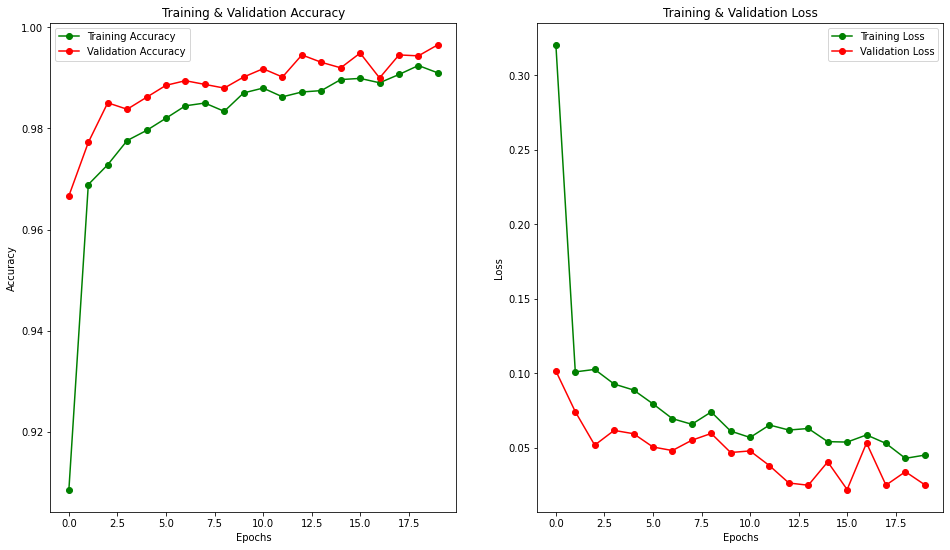

In [26]:
plot_loss_accuracy(history)

In [27]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_mobilenet.hdf5')

In [28]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 12s 55ms/step - loss: 0.0445 - accuracy: 0.9915 - f1_score: 0.9918 - precision: 0.9915 - recall: 0.9914


[0.04454348236322403,
 0.9914947152137756,
 array([0.991018  , 1.        , 1.        , 0.997955  , 0.9929221 ,
        1.        , 0.9886364 , 0.9716981 , 0.98947364, 0.9969789 ,
        1.        , 0.9836066 , 0.982699  , 1.        , 0.98161244,
        1.        , 0.96864116, 0.9879518 , 0.9979879 , 0.9776119 ,
        0.9971014 , 1.        , 0.99626863, 1.        ], dtype=float32),
 0.9914935231208801,
 0.991355299949646]

In [29]:
x_train = tf.keras.applications.mobilenet.preprocess_input(x_train)
model.evaluate(x_train,y_train)

858/858 [==============================] - 48s 56ms/step - loss: 0.0055 - accuracy: 0.9986 - f1_score: 0.9986 - precision: 0.9986 - recall: 0.9986


[0.005514152813702822,
 0.9985795021057129,
 array([0.9991119 , 1.        , 1.        , 0.99916387, 1.        ,
        1.        , 0.99954146, 0.9990119 , 0.9965458 , 1.        ,
        1.        , 0.99810606, 0.9969525 , 1.        , 1.        ,
        1.        , 0.99380326, 0.9962578 , 0.9995786 , 0.9914237 ,
        0.99861175, 1.        , 1.        , 0.99866015], dtype=float32),
 0.9985795021057129,
 0.9985795021057129]

In [30]:
predict_x= model.predict(x_test) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

225/225 [==============================] - 7s 33ms/step
[6 5 9 ... 2 4 2]


In [31]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [32]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      0.99      0.99       498
           5       1.00      1.00      1.00       247
           6       0.98      1.00      0.99       348
           7       1.00      0.94      0.97       436
           8       1.00      0.98      0.99       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       0.98      0.99      0.98       394
          13       0.99      0.98      0.98       291
          14       1.00      1.00      1.00       246
          15       0.96      1.00      0.98       347
          16       1.00      1.00      1.00       164
          17       0.97      0.97      0.97       144
          18       0.98    

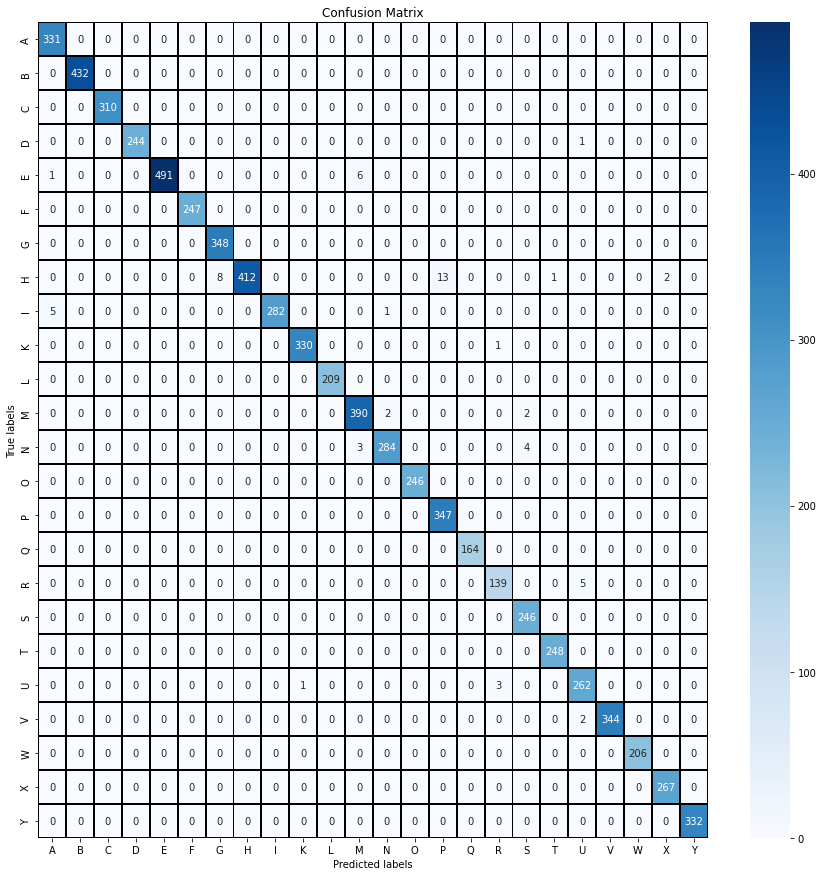

In [33]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(25) if i!=9] , columns = [i for i in range(25) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labele); ax.yaxis.set_ticklabels(labele);